In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_style("white")

## Linear regression example

In [2]:
price = np.array([7,20,13,59,40,51,37])
review_score = np.array([7,6,8,1,3,2,3])

**Mean**

In [3]:
type(price)

numpy.ndarray

In [4]:
price.mean()

32.42857142857143

In [5]:
review_score.mean()

4.285714285714286

**Variance**

In [6]:
ddof = 1

In [7]:
price.var(ddof=ddof)

384.61904761904754

In [8]:
review_score.var(ddof=ddof)

7.238095238095238

**Standard Deviation**

In [9]:
price.std(ddof=ddof)

19.611706902231827

In [10]:
np.sqrt(price.var(ddof=ddof))

19.611706902231827

In [12]:
review_score.std(ddof=ddof)

2.690370836538197

In [14]:
np.sqrt(review_score.var(ddof=ddof))

2.690370836538197

**Covariance**

In [15]:
cov = np.cov(price, review_score, ddof=ddof)
cov

array([[384.61904762, -51.30952381],
       [-51.30952381,   7.23809524]])

In [16]:
cov[1,0]

-51.3095238095238

**Correlation (Pearson)**

In [18]:
cov[0,1]/(np.sqrt(price.var(ddof=ddof) * review_score.var(ddof=ddof)))

-0.9724570819188173

In [19]:
corr = np.corrcoef(price, review_score)
corr

array([[ 1.        , -0.97245708],
       [-0.97245708,  1.        ]])

In [20]:
corr[0,1]

-0.9724570819188174

**Regression Coefficient**

In [21]:
# manually
beta_1 = cov[1,0]/price.var(ddof=ddof)
beta_1

-0.13340349139532007

In [22]:
beta_0 = review_score.mean() - beta_1*price.mean()
beta_0

8.611798935248236

In [23]:
# using statsmodels
df = pd.DataFrame({"y":review_score, "x":price})
df

,y,x
0,7,7
1,6,20
2,8,13
3,1,59
4,3,40
5,2,51
6,3,37


In [24]:
# add a constant
df = sm.add_constant(df)

/Users/ivanlopezlobato/miniconda3/envs/code_red/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [26]:
lin_reg = sm.OLS(df["y"],
                 df[["const","x"]]).fit()

In [27]:
type(lin_reg)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [28]:
lin_reg.summary()

/Users/ivanlopezlobato/miniconda3/envs/code_red/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     87.03
Date:                Wed, 27 May 2020   Prob (F-statistic):           0.000238
Time:                        17:58:59   Log-Likelihood:                -6.1262
No. Observations:                   7   AIC:                             16.25
Df Residuals:                       5   BIC:                             16.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6118      0.531     16.204      0.000       7.246       9.978
x             -0.1334      0.014     -9.329      0.000      -0.170      -0.097
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.559
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.457
Skew:                           0.582   Prob(JB):                        0.796
Kurtosis:                       2.539   Cond. No.                         76.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For increase in price 1 EUR, our review_score decreases 0.1334

In [30]:
df = df.assign(y_hat=lin_reg.predict(df[["const", "x"]]))
df

,const,y,x,y_hat
0,1.0,7,7,7.677974
1,1.0,6,20,5.943729
2,1.0,8,13,6.877554
3,1.0,1,59,0.740993
4,1.0,3,40,3.275659
5,1.0,2,51,1.808221
6,1.0,3,37,3.675870


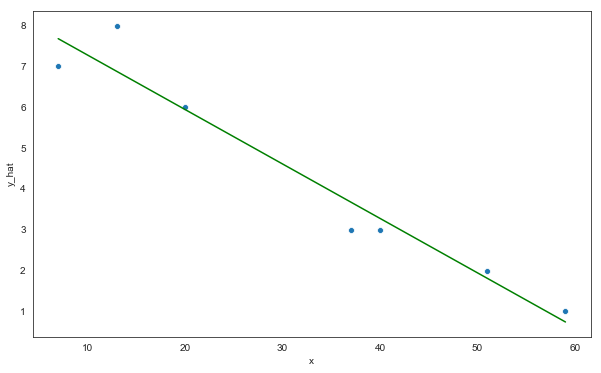

In [33]:
# plot the regression
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=df,
                x="x",
                y="y",
                ax=ax)

sns.lineplot(data=df,
             x="x",
             y="y_hat",
             color="green",
             ax=ax);

## Olist linear regression

In [34]:
# import mysql_connection  as mc

ModuleNotFoundError: No module named 'mysql_connection'

```sql
SELECT
	o.order_id,
	dor.review_score,
	DATEDIFF(DATE(o.order_estimated_delivery_date), DATE(o.order_purchase_timestamp)) AS estimated_delivery_days,
	DATEDIFF(DATE(o.order_delivered_customer_date), DATE(o.order_purchase_timestamp)) AS actual_delivery_days,
	DATEDIFF(DATE(o.order_estimated_delivery_date), DATE(o.order_purchase_timestamp)) - DATEDIFF(DATE(o.order_delivered_customer_date),DATE(o.order_purchase_timestamp)) AS delivery_diff
FROM orders o
	JOIN order_reviews dor
	ON o.order_id = dor.order_id
WHERE
	o.order_status = "delivered"
    
    


SELECT
    o.order_id,
    dor.review_score,
    DATEDIFF(DATE(o.order_estimated_delivery_date), DATE(o.order_purchase_timestamp)) AS estimated_delivery_days,
    DATEDIFF(DATE(o.order_delivered_customer_date), DATE(o.order_purchase_timestamp)) AS actual_delivery_days,
    DATEDIFF(DATE(o.order_estimated_delivery_date), DATE(o.order_purchase_timestamp))
    - DATEDIFF(DATE(o.order_delivered_customer_date), DATE(o.order_purchase_timestamp)) AS delivery_diff,
    oid.total_price,
    oid.shipping_costs,
    oid.order_size,
    oid.has_product_photo,
    oid.has_product_decription AS has_product_description
FROM orders o
    JOIN temp_dedup_order_reviews dor
    ON o.order_id = dor.order_id
    JOIN temp_order_item_details oid
    ON o.order_id = oid.order_id
WHERE o.order_status = 'delivered';
````


In [35]:
review_score = pd.read_csv("data/review_score_1.csv")

In [36]:
review_score

,order_id,review_score,estimated_delivery_days,actual_delivery_days,delivery_diff
0,73fc7af87114b39712e6da79b0a377eb,4,22,6.0,16.0
1,a548910a1c6147796b98fdf73dbeba33,5,14,10.0,4.0
2,f9e4b658b201a9f2ecdecbb34bed034b,5,34,13.0,21.0
3,658677c97b385a9be170737859d3511b,5,31,11.0,20.0
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,27,18.0,9.0
...,...,...,...,...,...
97010,22ec9f0669f784db00fa86d035cf8602,5,17,5.0,12.0
97011,55d4004744368f5571d1f590031933e4,5,19,3.0,16.0
97012,7725825d039fc1f0ceb7635e3f7d9206,4,24,8.0,16.0
97013,f8bd3f2000c28c5342fedeb5e50f2e75,1,19,4.0,15.0


### 1st Model: Do the review scores corralate with delivery_diff?

In [37]:
# add constant
review_score = sm.add_constant(review_score)

In [40]:
# drop inf values
review_score = review_score.replace([np.inf, -np.inf], np.nan).dropna()

In [41]:
rev_y = review_score["review_score"]
rev_X = review_score[["const", "delivery_diff"]]

rev_lr = sm.OLS(rev_y, rev_X).fit()

In [42]:
rev_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     7560.
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        18:37:30   Log-Likelihood:            -1.5920e+05
No. Observations:               97007   AIC:                         3.184e+05
Df Residuals:                   97005   BIC:                         3.184e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.7387      0.006    609.587      0.000       3.727       3.751
delivery_diff     0.0342      0.000     86.949      0.000       0.033       0.035
==============================================================================
Omnibus:                    19326.163   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33159.638
Skew:                          -1.346   Prob(JB):                         0.00
Kurtosis:                       3.981   Cond. No.                         23.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""